# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
# Various example URL's to test code on

# URL = 'http://www.indeed.com/jobs?q=data+scientist+%24120%2C000&l=Chicago%2C+IL&start=10&pp='
# URL = 'http://www.indeed.com/jobs?q=data+scientist&l=Chicago%2C+IL'
URL = 'http://www.indeed.com/jobs?q=data+scientist&l=Chicago%2C+IL&start=60&pp='

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import time
def time_delay(x):
    time.sleep(x)
    print 'I waited for %s seconds'

In [4]:
# Read page with BeautifulSoup
soup = BeautifulSoup(urllib2.urlopen(URL).read())

/home/nick/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /home/nick/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
# Previously I was trying to differentiate between sponsored and non-sponsored results. Now, instead, I'm just searching
# on the keyword 'result', which will return both and avoid having to deal with weird combinations of leading/trailing spaces

# JUST USE RESULT, NOT ROW RESULT WITH ANY WEIRD COMBINATION OF SPACES

# Sponsored postings
# print len(soup('div', {'class' : 'row result'}))
# print len(soup('div', {'class' : 'row  result'}))
# print len(soup('div', {'class' : 'row sjlast result'}))


# All Postings
print len(soup('div', {'class' : 'result'}))

10


In [6]:
# for row in soup('div', {'class' : 'row result'}):
#     print row.prettify(), '\n'

In [7]:
# Not using this anymore

# # #### For sponsored results

# data = {}
# counter = 0


# for row in soup('div'):
#     data[counter] = {}
#     if soup('div', {'class' : 'result'}):
#         for item in row('a',{'data-tn-element' : 'jobTitle'}):
#             data[counter]['Title'] = item.text
#         for item in row('span', {'class' : 'company'}):
#             data[counter]['Company'] = item.text
#         for item in row('span', {'class': 'location'}):
#             data[counter]['Location'] = item.text
#         for item in row('span', {'class': 'summary'}):
#             data[counter]['Summary'] = item.text
#         for item in row('td', {'class': 'snip'}):
#             if item('nobr'): # Salary doesn't exist for all entries
#                 for sal in item('nobr'):
#                     data[counter]['Salary'] = sal.text
#             else:
#                 data[counter]['Salary'] = None
#         counter += 1
#     else:
#         if row('div', {'class' : 'result'}):
#             for item in row('a',{'data-tn-element' : 'jobTitle'}):
#                 data[counter]['Title'] = item.text
#             for item in row('span', {'class' : 'company'}):
#                 data[counter]['Company'] = item.text
#             for item in row('span', {'class': 'location'}):
#                 data[counter]['Location'] = item.text
#             for item in row('span', {'class': 'summary'}):
#                 data[counter]['Summary'] = item.text
#             for item in row('td', {'class': 'snip'}):
#                 if item('nobr'): # Salary doesn't exist for all entries
#                     for sal in item('nobr'):
#                         data[counter]['Salary'] = sal.text
#                 else:
#                     data[counter]['Salary'] = None
#             counter += 1
#     print counter
#     print data[counter]

In [8]:
# # Initial test code to pull title, company, location, summary, and salary from result
# #### For all results

data = {}
counter = 0


for row in soup('div', {'class' : 'result'}):
    data[counter] = {}
    if row('a', {'data-tn-element': 'jobTitle'}):
        for item in row('a',{'data-tn-element' : 'jobTitle'}):
            data[counter]['Title'] = item.text
    else:
        data[counter]['Title'] = None
    for item in row('span', {'class' : 'company'}):
        data[counter]['Company'] = item.text
    for item in row('span', {'class': 'location'}):
        data[counter]['Location'] = item.text
    for item in row('span', {'class': 'summary'}):
        data[counter]['Summary'] = item.text
    for item in row('td', {'class': 'snip'}):
        if item('nobr'): # Salary doesn't exist for all entries
            for sal in item('nobr'):
                data[counter]['Salary'] = sal.text
        else:
            data[counter]['Salary'] = None
    counter += 1


In [9]:
data

{0: {'Company': u'\n\n\n        Echo Global Logistics\n',
  'Location': u'Chicago, IL 60654 (Loop area)',
  'Salary': None,
  'Summary': u'\nReporting to the Principal Data Scientist, this role uses statistical and analytic techniques, including descriptive and predictive modeling, machine learning,...',
  'Title': u'Associate Data Scientist'},
 1: {'Company': u'\n\n\n        HERE\n',
  'Location': u'Chicago, IL',
  'Salary': None,
  'Summary': u'\nTrends in the data and presents them to other scientists and business managers. Computational statistics/science, data mining, machine learning, and...',
  'Title': u'Production Data Scientist'},
 2: {'Company': u'\n\n\n        IRI\n',
  'Location': u'Chicago, IL',
  'Salary': None,
  'Summary': u'\nOur R&D team is expanding and looking for the right person to work with other data scientists, product managers, and technology teams to develop new and...',
  'Title': u'R&D Data Science Consultant'},
 3: {'Company': u'\n\n\n        DePaul Unive

In [10]:
# Transform data into pd DataFrame
df = pd.DataFrame(data).T
df

,Company,Location,Salary,Summary,Title
0,\n\n\n Echo Global Logistics\n,"Chicago, IL 60654 (Loop area)",None,"\nReporting to the Principal Data Scientist, t...",Associate Data Scientist
1,\n\n\n HERE\n,"Chicago, IL",None,\nTrends in the data and presents them to othe...,Production Data Scientist
2,\n\n\n IRI\n,"Chicago, IL",None,\nOur R&D team is expanding and looking for th...,R&D Data Science Consultant
3,\n\n\n DePaul University\n,"Chicago, IL 60604 (Loop area)",None,\nThe purpose of this position is to find a ta...,Research Engineer
4,\n\n Kelton Global\n,"Chicago, IL",None,\nOne to two years of relevant quantitative ex...,"Analyst, Quantitative Research"
5,\n\n\n Prosperoware\n,"Chicago, IL 60601 (Loop area)",None,"\nExperience with data mining, machine learnin...",Data Scientist
6,\n\n\n Jobspring Partners\n,"Chicago, IL","$100,000 - $120,000 a year",\nThis role is ideal for someone who has a str...,Machine Learning Engineer
7,\n\n\n KPMG\n,"Chicago, IL 60601 (Loop area)",None,"\nMachine learning, data visualization, statis...",Sr Associate - Data Scientist
8,\n\n Valence Health\n,"Chicago, IL",None,"\nLeveraging 20 years of experience, Valence H...",Senior Data Analyst - Healthcare
9,\n\n Civis Analytics\n,"Chicago, IL",None,"\nWith a specialization in unstructured data, ...",Senior Data Scientist - Unstructured Data


Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it
    - Remember to use `try/except` if you anticipate errors
- **Test** the functions on the results above and simple examples

In [11]:
## Helper functions for piece of information we want to extract

def extract_title_from_result(result):
    for item in result('a',{'data-tn-element' : 'jobTitle'}):
        return (item.text).encode('utf-8')
    
def extract_company_from_result(result):
    for item in result('span', {'class' : 'company'}):
        return (item.text).encode('utf-8')

def extract_location_from_result(result):
    for item in result('span', {'class': 'location'}):
        return (item.text).encode('utf-8')

def extract_salary_from_result(result):
    for item in result('td', {'class': 'snip'}):
        if item('nobr'):
            for sal in item('nobr'):
                return (sal.text).encode('utf-8')
        else:
            return None

def extract_summary_from_result(result):
    for item in result('span', {'class': 'summary'}):
        return (item.text).encode('utf-8')

In [12]:
# Master function that combines all the functions above and will grab the full results for a given page

def get_page_results(URL, count, city):
    soup = BeautifulSoup(urllib2.urlopen(URL).read())
    
    for row in soup('div', {'class' : 'result'}):
        data[count] = {}

        data[count]['Title'] = extract_title_from_result(row)
        data[count]['Company'] = extract_company_from_result(row)
        data[count]['Location'] = extract_location_from_result(row)
        data[count]['Salary'] = extract_salary_from_result(row)
        data[count]['Summary'] = extract_summary_from_result(row)
        data[count]['Search City'] = city

        count += 1
    time.sleep(2.0)
    return data, count

In [14]:
# Testing on one page

data = {}
counter = 0

data, counter = get_page_results(URL, counter, 'Chicago')

In [15]:
counter

10

In [16]:
df = pd.DataFrame(data).T
df.head()

,Company,Location,Salary,Search City,Summary,Title
0,\n\n\n Echo Global Logistics\n,"Chicago, IL 60654 (Loop area)",None,Chicago,"\nReporting to the Principal Data Scientist, t...",Associate Data Scientist
1,\n\n\n HERE\n,"Chicago, IL",None,Chicago,\nTrends in the data and presents them to othe...,Production Data Scientist
2,\n\n\n IRI\n,"Chicago, IL",None,Chicago,\nOur R&D team is expanding and looking for th...,R&D Data Science Consultant
3,\n\n\n DePaul University\n,"Chicago, IL 60604 (Loop area)",None,Chicago,\nThe purpose of this position is to find a ta...,Research Engineer
4,\n\n Kelton Global\n,"Chicago, IL",None,Chicago,\nOne to two years of relevant quantitative ex...,"Analyst, Quantitative Research"


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [17]:
# Testing code on multiple URL's, just two to start
URL_list = ['http://www.indeed.com/jobs?q=data+scientist&l=Chicago%2C+IL&start=20&pp=', 
            'http://www.indeed.com/jobs?q=data+scientist&l=Chicago%2C+IL&start=30&pp=']

In [18]:
data = {}
counter = 0

for url in URL_list:
    data, counter = get_page_results(url, counter, 'Chicago')

In [19]:
data

{0: {'Company': '\n\n        Allstate Insurance',
  'Location': 'Chicago, IL 60601',
  'Salary': None,
  'Search City': 'Chicago',
  'Summary': 'We work collaboratively with both \xe2\x80\x98product teams\xe2\x80\x99 and data scientists in support of Allstate business goals. Partners closely with technical and non-technical...',
  'Title': 'Android Application Developer - Connected Car'},
 1: {'Company': '\n\n        BAXTER',
  'Location': 'Deerfield, IL',
  'Salary': None,
  'Search City': 'Chicago',
  'Summary': 'They play the role s of employee advocates, strategic business partners, change agents , and process experts, applying competencies in human capital planning,...',
  'Title': '2016 National Black MBA Association Conference'},
 2: {'Company': '\n    Parallel Partners',
  'Location': 'Chicago, IL 60606',
  'Salary': None,
  'Search City': 'Chicago',
  'Summary': 'Chicago IL Jobs, Quantitative Research Analyst, Python, SQL, Linux, UNIX, R, MatLab, Financial, Chicago Recruiters,

In [20]:
counter

28

In [21]:
df = pd.DataFrame(data).T
df.head()

,Company,Location,Salary,Search City,Summary,Title
0,\n\n Allstate Insurance,"Chicago, IL 60601",None,Chicago,We work collaboratively with both ‘product tea...,Android Application Developer - Connected Car
1,\n\n BAXTER,"Deerfield, IL",None,Chicago,"They play the role s of employee advocates, st...",2016 National Black MBA Association Conference
2,\n Parallel Partners,"Chicago, IL 60606",None,Chicago,"Chicago IL Jobs, Quantitative Research Analyst...",Quantitative Research Analyst - MS101336
3,"\n\n Vizient, Inc.\n","Chicago, IL",None,Chicago,\nServes as the resident data expert and share...,Data Scientist
4,\n\n\n National Collegiate Scouting Ass...,"Chicago, IL 60642 (Portage Park area)",None,Chicago,\nAs a Data Scientist at NCSA Athletic Recruit...,Data Scientist


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [25]:
# Generate full list of URL's to search on and store in url_list
# Also runs get_page_results on each page and stores result in data

max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
data = {}
counter = 0
url_list = []

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami']):
    print 'Searching for jobs in:', city
    
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        url_template = "http://www.indeed.com/jobs?q=data+scientist&l=%s&start=%s&pp=" % (city, start)
        # Append to the full set of results
        data, counter = get_page_results(url_template, counter, city)
        
        url_list.append(url_template)

Searching for jobs in: Houston
Searching for jobs in: Phoenix
Searching for jobs in: Chicago
Searching for jobs in: San+Francisco
Searching for jobs in: New+York
Searching for jobs in: Dallas
Searching for jobs in: Philadelphia
Searching for jobs in: Denver
Searching for jobs in: Los+Angeles
Searching for jobs in: Pittsburgh
Searching for jobs in: Miami
Searching for jobs in: Atlanta
Searching for jobs in: Seattle
Searching for jobs in: Austin
Searching for jobs in: Portland


In [26]:
print len(url_list)
print url_list[0]

150
http://www.indeed.com/jobs?q=data+scientist&l=Houston&start=0&pp=


In [27]:
# Added this into the loop above so I could include the city I searched on

# Run the code on every URL in the list, store result in data dictionary
# data = {}
# counter = 0

# for i in range(len(url_list)):
#     data, counter = get_page_results(url_list[i], counter)
#     if i % 10 == 0:
#         print 'Finished index', i, 'of', len(url_list)

In [28]:
# Transform data dictionary into master pd DataFrame
df = pd.DataFrame(data).T
print df.shape
df.head()

(1769, 6)


,Company,Location,Salary,Search City,Summary,Title
0,\n\n SYSCO,"Houston, TX 77038",None,Houston,Build predictive analytics models with Python ...,Sr Data Scientist
1,\n alliantgroup,"Houston, TX",None,Houston,"Engineers, and scientists to identify and subs...",Project Associate
2,\n Arundo Analytics,"Houston, TX",None,Houston,Senior Data Scientist with expertise in machin...,Machine Learning Expert
3,\n\n Quantlab Financial\n,"Houston, TX",None,Houston,\nTechnology and Scientific Research are centr...,Quantitative Research Scientist - Options Stra...
4,\n\n\n Exxon Mobil\n,"Houston, TX",None,Houston,\nExperience in relevant areas of scientific e...,Data Scientist


In [29]:
# Removing duplicates, because often the same sponsored results will show up on multiple pages
df.drop_duplicates(inplace=True)
print df.shape

(1739, 6)


In [30]:
# Cleaning ugly text
for col in df:
    df[col] = df[col].str.replace('\n','')
#     df[col] = df[col].replace('\u2013','')
    
df.head(20)

,Company,Location,Salary,Search City,Summary,Title
0,SYSCO,"Houston, TX 77038",None,Houston,Build predictive analytics models with Python ...,Sr Data Scientist
1,alliantgroup,"Houston, TX",None,Houston,"Engineers, and scientists to identify and subs...",Project Associate
2,Arundo Analytics,"Houston, TX",None,Houston,Senior Data Scientist with expertise in machin...,Machine Learning Expert
3,Quantlab Financial,"Houston, TX",None,Houston,Technology and Scientific Research are central...,Quantitative Research Scientist - Options Stra...
4,Exxon Mobil,"Houston, TX",None,Houston,Experience in relevant areas of scientific exp...,Data Scientist
5,Pros.,"Houston, TX",None,Houston,Machine Learning and Data Science. In this rol...,Scientist I
6,Reed Elsevier,"Houston, TX",None,Houston,"A global company based in Amsterdam, Elsevier ...",Psychometrician – Data Analyst
7,Shell,"Houston, TX",None,Houston,"Before applying, you are advised to read our d...","Quantitative Risk Analyst (Houston, TX)"
8,"Enaxis Consulting, LP","Houston, TX 77046 (Montrose area)",None,Houston,"Work with data scientists, visualization speci...",Analytics Data Engineer
9,SYSCO,"Houston, TX 77038",None,Houston,Build predictive analytics models with Python ...,Sr Data Scientist


In [31]:
df.dtypes

Company        object
Location       object
Salary         object
Search City    object
Summary        object
Title          object
dtype: object

In [32]:
# Exporting to temporary csv so I don't have to regenerate data
df.to_csv('dirty_data.csv')

In [2]:
# Importing from csv, so I don't have to run the webscraping code above every time I open the notebook again
df = pd.read_csv('dirty_data.csv')

In [3]:
print df.shape
df.head()

(1739, 7)


,Unnamed: 0,Company,Location,Salary,Search City,Summary,Title
0,0,SYSCO,"Houston, TX 77038",NaN,Houston,Build predictive analytics models with Python ...,Sr Data Scientist
1,1,alliantgroup,"Houston, TX",NaN,Houston,"Engineers, and scientists to identify and subs...",Project Associate
2,2,Arundo Analytics,"Houston, TX",NaN,Houston,Senior Data Scientist with expertise in machin...,Machine Learning Expert
3,3,Quantlab Financial,"Houston, TX",NaN,Houston,Technology and Scientific Research are central...,Quantitative Research Scientist - Options Stra...
4,4,Exxon Mobil,"Houston, TX",NaN,Houston,Experience in relevant areas of scientific exp...,Data Scientist


In [4]:
df.drop('Unnamed: 0', axis=1, inplace= True)
df.head()

,Company,Location,Salary,Search City,Summary,Title
0,SYSCO,"Houston, TX 77038",NaN,Houston,Build predictive analytics models with Python ...,Sr Data Scientist
1,alliantgroup,"Houston, TX",NaN,Houston,"Engineers, and scientists to identify and subs...",Project Associate
2,Arundo Analytics,"Houston, TX",NaN,Houston,Senior Data Scientist with expertise in machin...,Machine Learning Expert
3,Quantlab Financial,"Houston, TX",NaN,Houston,Technology and Scientific Research are central...,Quantitative Research Scientist - Options Stra...
4,Exxon Mobil,"Houston, TX",NaN,Houston,Experience in relevant areas of scientific exp...,Data Scientist


Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [5]:
df['Salary'].isnull().value_counts()

True     1606
False     133
Name: Salary, dtype: int64

In [6]:
# Create separate dataframe for only entries with a salary
has_salary = df[(df['Salary'].isnull() == False)]
has_salary.reset_index(inplace=True)
# has_salary.drop('index', axis=1, inplace=True)
print has_salary.shape
has_salary.head()

(133, 7)


,index,Company,Location,Salary,Search City,Summary,Title
0,22,SearchAccountingJobs,"Houston, TX","$150,000 - $205,000 a year",Houston,Lead the review and care of relevant model and...,Quantitative Risk Analyst
1,24,MD Anderson Cancer Center,"Houston, TX","$45,500 - $82,000 a year",Houston,The University of Texas MD Anderson Cancer Cen...,Research Admin Analyst
2,33,Clearpoint,"Houston, TX",$64.50 a day,Houston,Support our Search Science projects using Text...,SEM Data Scientist | Search Engine Marketing A...
3,36,MD Anderson Cancer Center,"Houston, TX","$66,800 - $100,200 a year",Houston,Certified Medical Technologist (MT) or Medical...,"Supv, Cell Therapy Lab"
4,42,MD Anderson Cancer Center,"Houston, TX","$46,500 - $83,000 a year",Houston,Analyze data to ensure integrity and efficienc...,Institute Assoc Scientist II - Program Biology...


In [7]:
print has_salary['Salary'][0:5]

0    $150,000 - $205,000 a year
1      $45,500 - $82,000 a year
2                  $64.50 a day
3     $66,800 - $100,200 a year
4      $46,500 - $83,000 a year
Name: Salary, dtype: object


In [8]:
# Cleaning salary column
has_salary['Salary'] = has_salary['Salary'].str.replace('$','')
has_salary['Salary'] = has_salary['Salary'].str.replace(',','')
has_salary['Salary'] = has_salary['Salary'].str.replace('-','')
has_salary['Salary'][0:5]

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

0    150000  205000 a year
1      45500  82000 a year
2              64.50 a day
3     66800  100200 a year
4      46500  83000 a year
Name: Salary, dtype: object

In [9]:
# Creating new dataframe to calculate average yearly salary
splitter = lambda x: pd.Series([i for i in reversed(x.split(' '))])
split_sals = has_salary['Salary'].apply(splitter)

In [10]:
split_sals.head(20)

,0,1,2,3,4
0,year,a,205000,,150000
1,year,a,82000,,45500
2,day,a,64.50,NaN,NaN
3,year,a,100200,,66800
4,year,a,83000,,46500
5,year,a,54590,NaN,NaN
6,year,a,91000,,70000
7,year,a,102000,,83000
8,year,a,65000,NaN,NaN
9,year,a,72000,NaN,NaN


In [11]:
split_sals.drop([1, 3], axis=1, inplace=True)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [12]:
print split_sals.shape
split_sals.columns = ['Frequency', 'max', 'min']
split_sals.head()

(133, 3)


,Frequency,max,min
0,year,205000,150000
1,year,82000,45500
2,day,64.50,NaN
3,year,100200,66800
4,year,83000,46500


In [13]:
split_sals['max'] = split_sals['max'].astype(float)
split_sals['min'] = split_sals['min'].astype(float)

In [14]:
split_sals.dtypes

Frequency     object
max          float64
min          float64
dtype: object

In [15]:
split_sals['min'].isnull().value_counts()

False    85
True     48
Name: min, dtype: int64

In [16]:
# This is probably horribly inefficient, but it works
# Averaging the salaries for entries where a range is given, or just taking the one entry if no range
import math

split_sals['Average Salary'] = 0.0

for row in range(len(split_sals['max'])):
#     print split_sals['min'][row]
    if math.isnan(split_sals['min'][row]):
#         print row
        split_sals['Average Salary'][row] = float(split_sals['max'][row])
    else:
        split_sals['Average Salary'][row] = float(np.mean([split_sals['max'][row], split_sals['min'][row]]))

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
print split_sals.dtypes
split_sals.head()

Frequency          object
max               float64
min               float64
Average Salary    float64
dtype: object


,Frequency,max,min,Average Salary
0,year,205000.0,150000.0,177500.0
1,year,82000.0,45500.0,63750.0
2,day,64.5,NaN,64.5
3,year,100200.0,66800.0,83500.0
4,year,83000.0,46500.0,64750.0


In [18]:
print split_sals['Average Salary'].isnull().any()
print split_sals['Frequency'].isnull().any()

False
False


In [19]:
split_sals['Frequency'].value_counts()

year     98
month    23
hour      9
day       2
week      1
Name: Frequency, dtype: int64

In [20]:
# Convert all the monthly, weekly, etc. salaries to yearly
split_sals['Yearly Salary'] = 0.0

for row in range(len(split_sals)):
    if split_sals['Frequency'][row] == 'year':
        split_sals['Yearly Salary'][row] = split_sals['Average Salary'][row]
    elif split_sals['Frequency'][row] == 'month':
        split_sals['Yearly Salary'][row] = (split_sals['Average Salary'][row] * 12.0) # 12 months in a year
    elif split_sals['Frequency'][row] == 'week':
        split_sals['Yearly Salary'][row] = (split_sals['Average Salary'][row] * 52.0) # 52 weeks in a year
    elif split_sals['Frequency'][row] == 'day':
        split_sals['Yearly Salary'][row] = (split_sals['Average Salary'][row] * 260.0) # 260 weekdays in a year
    elif split_sals['Frequency'][row] == 'hour':
        split_sals['Yearly Salary'][row] = (split_sals['Average Salary'][row] * 2080.0) # 2080 hours in a work year at 8 hours a day

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a co

In [21]:
split_sals.head()

,Frequency,max,min,Average Salary,Yearly Salary
0,year,205000.0,150000.0,177500.0,177500.0
1,year,82000.0,45500.0,63750.0,63750.0
2,day,64.5,NaN,64.5,16770.0
3,year,100200.0,66800.0,83500.0,83500.0
4,year,83000.0,46500.0,64750.0,64750.0


In [22]:
has_salary['Yearly Salary'] = split_sals['Yearly Salary']

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
has_salary.head(20)

,index,Company,Location,Salary,Search City,Summary,Title,Yearly Salary
0,22,SearchAccountingJobs,"Houston, TX",150000 205000 a year,Houston,Lead the review and care of relevant model and...,Quantitative Risk Analyst,177500.0
1,24,MD Anderson Cancer Center,"Houston, TX",45500 82000 a year,Houston,The University of Texas MD Anderson Cancer Cen...,Research Admin Analyst,63750.0
2,33,Clearpoint,"Houston, TX",64.50 a day,Houston,Support our Search Science projects using Text...,SEM Data Scientist | Search Engine Marketing A...,16770.0
3,36,MD Anderson Cancer Center,"Houston, TX",66800 100200 a year,Houston,Certified Medical Technologist (MT) or Medical...,"Supv, Cell Therapy Lab",83500.0
4,42,MD Anderson Cancer Center,"Houston, TX",46500 83000 a year,Houston,Analyze data to ensure integrity and efficienc...,Institute Assoc Scientist II - Program Biology...,64750.0
5,46,Baylor College of Medicine,"Houston, TX",54590 a year,Houston,Five years of clinical research or laboratory ...,Senior Research Quality Assurance Analyst,54590.0
6,53,Baylor College of Medicine,"Houston, TX",70000 91000 a year,Houston,3 years’ experience in scientific programming ...,Sr. Bioinformatics Programmer,80500.0
7,54,Baylor College of Medicine,"Houston, TX",83000 102000 a year,Houston,"PM, LIMS, QC, IT, Clinical feature requests. I...",Lead Bioinformatics Programmer,92500.0
8,56,Baylor College of Medicine,"Houston, TX",65000 a year,Houston,Using data from Principal Investigators and st...,Research Financial Analyst II,65000.0
9,60,Baylor College of Medicine,"Houston, TX",72000 a year,Houston,Five years experience in biomedical research c...,Senior Research Policy Analyst,72000.0


In [24]:
# I did this instead of merging because I coudln't get the merge to work
df['Yearly Salary'] = np.nan

for row in range(len(df)):
    for i in range(len(has_salary)):
        if has_salary['index'][i] == row:
            df['Yearly Salary'][row] = has_salary['Yearly Salary'][i]

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
df.head(20)

,Company,Location,Salary,Search City,Summary,Title,Yearly Salary
0,SYSCO,"Houston, TX 77038",NaN,Houston,Build predictive analytics models with Python ...,Sr Data Scientist,NaN
1,alliantgroup,"Houston, TX",NaN,Houston,"Engineers, and scientists to identify and subs...",Project Associate,NaN
2,Arundo Analytics,"Houston, TX",NaN,Houston,Senior Data Scientist with expertise in machin...,Machine Learning Expert,NaN
3,Quantlab Financial,"Houston, TX",NaN,Houston,Technology and Scientific Research are central...,Quantitative Research Scientist - Options Stra...,NaN
4,Exxon Mobil,"Houston, TX",NaN,Houston,Experience in relevant areas of scientific exp...,Data Scientist,NaN
5,Pros.,"Houston, TX",NaN,Houston,Machine Learning and Data Science. In this rol...,Scientist I,NaN
6,Reed Elsevier,"Houston, TX",NaN,Houston,"A global company based in Amsterdam, Elsevier ...",Psychometrician – Data Analyst,NaN
7,Shell,"Houston, TX",NaN,Houston,"Before applying, you are advised to read our d...","Quantitative Risk Analyst (Houston, TX)",NaN
8,"Enaxis Consulting, LP","Houston, TX 77046 (Montrose area)",NaN,Houston,"Work with data scientists, visualization speci...",Analytics Data Engineer,NaN
9,SYSCO,"Houston, TX 77038",NaN,Houston,Build predictive analytics models with Python ...,Sr Data Scientist,NaN


In [26]:
# df.merge(has_salary[['index', 'Yearly Salary']], how='left', left_index=True, right_index=True)

In [27]:
df['Yearly Salary'].isnull().value_counts()

True     1606
False     133
Name: Yearly Salary, dtype: int64

### Save your results as a CSV

In [28]:
## YOUR CODE HERE
df.to_csv('clean_data.csv')
has_salary.to_csv('has_salary.csv')

In [29]:
df = pd.read_csv('clean_data.csv')
has_salary = pd.read_csv('has_salary.csv')

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [30]:
## YOUR CODE HERE
has_salary['Yearly Salary'].describe()

count       133.000000
mean      79196.125564
std       41070.272694
min       12000.000000
25%       55000.000000
50%       68587.500000
75%       95000.000000
max      250000.000000
Name: Yearly Salary, dtype: float64

In [31]:
has_salary['Yearly Salary'].median()

68587.5

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [32]:
## Set is_high_salary to 1 if salary is higher than the median

has_salary['is_high_salary'] = 0

for row in range(len(has_salary)):
    if has_salary['Yearly Salary'][row] >= (has_salary['Yearly Salary'].median()):
        has_salary['is_high_salary'][row] = 1
        
has_salary['is_high_salary'].value_counts()

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    67
0    66
Name: is_high_salary, dtype: int64

In [33]:
has_salary.head(10)

,Unnamed: 0,index,Company,Location,Salary,Search City,Summary,Title,Yearly Salary,is_high_salary
0,0,22,SearchAccountingJobs,"Houston, TX",150000 205000 a year,Houston,Lead the review and care of relevant model and...,Quantitative Risk Analyst,177500.0,1
1,1,24,MD Anderson Cancer Center,"Houston, TX",45500 82000 a year,Houston,The University of Texas MD Anderson Cancer Cen...,Research Admin Analyst,63750.0,0
2,2,33,Clearpoint,"Houston, TX",64.50 a day,Houston,Support our Search Science projects using Text...,SEM Data Scientist | Search Engine Marketing A...,16770.0,0
3,3,36,MD Anderson Cancer Center,"Houston, TX",66800 100200 a year,Houston,Certified Medical Technologist (MT) or Medical...,"Supv, Cell Therapy Lab",83500.0,1
4,4,42,MD Anderson Cancer Center,"Houston, TX",46500 83000 a year,Houston,Analyze data to ensure integrity and efficienc...,Institute Assoc Scientist II - Program Biology...,64750.0,0
5,5,46,Baylor College of Medicine,"Houston, TX",54590 a year,Houston,Five years of clinical research or laboratory ...,Senior Research Quality Assurance Analyst,54590.0,0
6,6,53,Baylor College of Medicine,"Houston, TX",70000 91000 a year,Houston,3 years’ experience in scientific programming ...,Sr. Bioinformatics Programmer,80500.0,1
7,7,54,Baylor College of Medicine,"Houston, TX",83000 102000 a year,Houston,"PM, LIMS, QC, IT, Clinical feature requests. I...",Lead Bioinformatics Programmer,92500.0,1
8,8,56,Baylor College of Medicine,"Houston, TX",65000 a year,Houston,Using data from Principal Investigators and st...,Research Financial Analyst II,65000.0,0
9,9,60,Baylor College of Medicine,"Houston, TX",72000 a year,Houston,Five years experience in biomedical research c...,Senior Research Policy Analyst,72000.0,1


#### Thought experiment: What is the baseline accuracy for this model?

The baseline accuracy we should be aiming for is 50%, since that would at least be better than randomly assigning either 1 or 0 to is_high_salary.

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [34]:
## YOUR CODE HERE
city_dummies = pd.get_dummies(has_salary['Search City'])
city_dummies['is_high_salary'] = has_salary['is_high_salary']

In [35]:
city_dummies.head(10)

,Atlanta,Austin,Chicago,Dallas,Denver,Houston,Los+Angeles,Miami,New+York,Philadelphia,Phoenix,Pittsburgh,Portland,San+Francisco,Seattle,is_high_salary
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [36]:
from statsmodels.discrete.discrete_model import Logit
X = city_dummies.drop(['is_high_salary'], axis=1)
y = city_dummies['is_high_salary']

In [37]:
logit = Logit(y, X)
model_sm = logit.fit()

         Current function value: 0.536593
         Iterations: 35


/home/nick/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [38]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         is_high_salary   No. Observations:                  133
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                  0.2258
Time:                        10:16:44   Log-Likelihood:                -71.367
converged:                      False   LL-Null:                       -92.185
                                        LLR p-value:                 0.0001412
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Atlanta          23.5176   4.83e+04      0.000      1.000     -9.47e+04  9.47e+04
Austin            0.3185      0.465      0.685      0.493        -0.592     1.229
Chicago          32.7657   5.78e+06   5.67e-06      1.000     -1.13e+07  1.13e+07
Dallas            1.2528      0.802      1.562      0.118        -0.319     2.824
Denver           -0.1823      0.606     -0.301      0.763        -1.369     1.004
Houston           0.1542      0.556      0.277      0.782        -0.936     1.245
Los+Angeles      -0.6931      0.866     -0.800      0.423        -2.391     1.004
Miami            -0.7885      0.539     -1.462      0.144        -1.846     0.269
New+York         23.6942   9.88e+04      0.000      1.000     -1.94e+05  1.94e+05
Philadelphia      1.7918      1.080      1.659      0.097        -0.325     3.909
Phoenix          -1.3218      0.563     -2.349      0.019        -2.425    -0.219
Pittsburgh       -1.6094      1.095     -1.469      0.142        -3.756     0.538
Portland         -0.9163      0.837     -1.095      0.273        -2.556     0.724
San+Francisco    -0.6931      1.225     -0.566      0.571        -3.094     1.707
Seattle           0.6931      1.225      0.566      0.571        -1.707     3.094
=================================================================================
"""

The coefficients in a logistic regression model represent how much each variable effects the model.

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [39]:
# Create a few variables based on words in the title
has_salary['senior'] = has_salary['Title'].str.lower().str.contains('senior')
print has_salary['senior'].value_counts()
has_salary['manager'] = has_salary['Title'].str.lower().str.contains('manager')
print has_salary['manager'].value_counts()
has_salary['scientist'] = has_salary['Title'].str.lower().str.contains('scientist')
print has_salary['scientist'].value_counts()
has_salary['analyst'] = has_salary['Title'].str.lower().str.contains('analyst')
print has_salary['analyst'].value_counts()

False    117
True      16
Name: senior, dtype: int64
False    129
True       4
Name: manager, dtype: int64
False    86
True     47
Name: scientist, dtype: int64
False    99
True     34
Name: analyst, dtype: int64


In [40]:
# Add these variables to the dummies for location
city_dummies['senior'] = has_salary['senior']
city_dummies['manager'] = has_salary['manager']
city_dummies['scientist'] = has_salary['scientist']
city_dummies['analyst'] = has_salary['analyst']

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [41]:
# Build a model using sklearn's LogisticRegression()
from sklearn.linear_model import LogisticRegression

X = city_dummies.drop(['is_high_salary'], axis=1) # Include all location and word dummy variables, drop is_high_salary
y = city_dummies['is_high_salary']

logit = LogisticRegression()
model = logit.fit(X, y)
predictions = model.predict(X)

print model.score(X, y)

0.766917293233


In [42]:
city_dummies.corr()

,Atlanta,Austin,Chicago,Dallas,Denver,Houston,Los+Angeles,Miami,New+York,Philadelphia,Phoenix,Pittsburgh,Portland,San+Francisco,Seattle,is_high_salary,senior,manager,scientist,analyst
Atlanta,1.000000,-0.096225,-0.046585,-0.063500,-0.070775,-0.077579,-0.051232,-0.087163,-0.029123,-0.055556,-0.096225,-0.051232,-0.055556,-0.035806,-0.035806,0.233937,0.016343,-0.041505,0.177954,-0.060939
Austin,-0.096225,1.000000,-0.080687,-0.109985,-0.122586,-0.134371,-0.088736,-0.150970,-0.050443,-0.096225,-0.166667,-0.088736,-0.096225,-0.062017,-0.062017,0.061392,0.113228,-0.071889,0.237590,-0.042220
Chicago,-0.046585,-0.080687,1.000000,-0.053246,-0.059347,-0.065052,-0.042959,-0.073088,-0.024421,-0.046585,-0.080687,-0.042959,-0.046585,-0.030024,-0.030024,0.196162,-0.073088,-0.034803,0.101966,-0.025209
Dallas,-0.063500,-0.109985,-0.053246,1.000000,-0.080896,-0.088673,-0.058558,-0.099627,-0.033288,-0.063500,-0.109985,-0.058558,-0.063500,-0.040926,-0.040926,0.147650,-0.099627,-0.047440,0.051321,-0.020638
Denver,-0.070775,-0.122586,-0.059347,-0.080896,1.000000,-0.098832,-0.065266,-0.111041,-0.037102,-0.070775,-0.122586,-0.065266,-0.070775,-0.045615,-0.045615,-0.029556,0.056782,-0.052875,-0.107770,0.074340
Houston,-0.077579,-0.134371,-0.065052,-0.088673,-0.098832,1.000000,-0.071541,-0.121716,-0.040669,-0.077579,-0.134371,-0.071541,-0.077579,-0.050000,-0.050000,0.022844,0.033940,-0.057958,-0.084426,0.155357
Los+Angeles,-0.051232,-0.088736,-0.042959,-0.058558,-0.065266,-0.071541,1.000000,-0.080379,-0.026857,-0.051232,-0.088736,-0.047244,-0.051232,-0.033019,-0.033019,-0.074089,0.142337,-0.038274,-0.009117,0.038713
Miami,-0.087163,-0.150970,-0.073088,-0.099627,-0.111041,-0.121716,-0.080379,1.000000,-0.045693,-0.087163,-0.150970,-0.080379,-0.087163,-0.056177,-0.056177,-0.141459,-0.136752,-0.065118,-0.128329,0.101187
New+York,-0.029123,-0.050443,-0.024421,-0.033288,-0.037102,-0.040669,-0.026857,-0.045693,1.000000,-0.029123,-0.050443,-0.026857,-0.029123,-0.018770,-0.018770,0.122635,-0.045693,-0.021758,0.167140,-0.072410
Philadelphia,-0.055556,-0.096225,-0.046585,-0.063500,-0.070775,-0.077579,-0.051232,-0.087163,-0.029123,1.000000,-0.096225,-0.051232,-0.055556,-0.035806,-0.035806,0.166591,0.119849,0.155643,0.107514,-0.060939


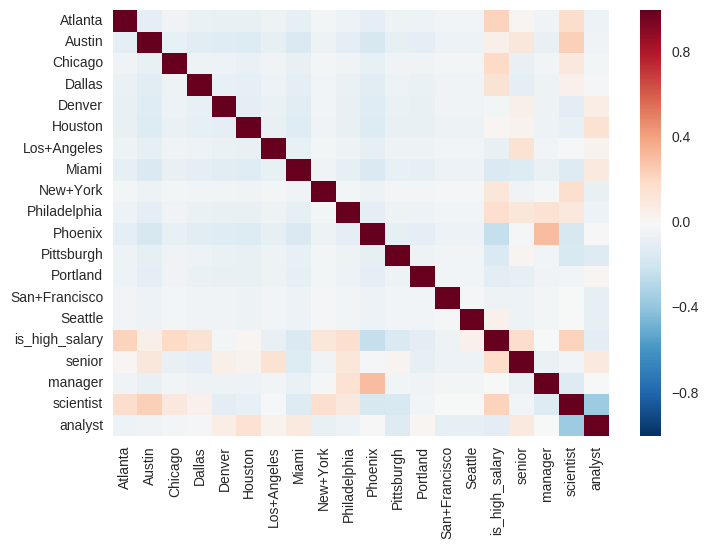

In [43]:
sns.heatmap(city_dummies.corr())

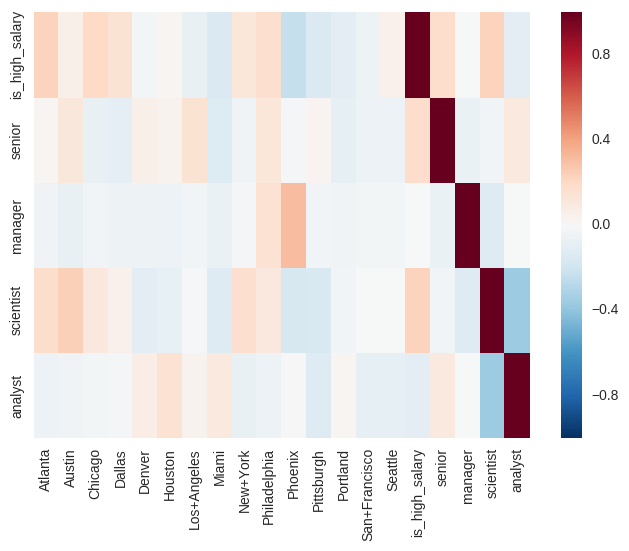

In [44]:
cormat = city_dummies.corr()
sns.heatmap(cormat[-5:])

The words 'scientist' or 'senior' being included in the job title tend to correlate with the job having a higher salary. Additionally, some cities, specifically, Atlanta, Chicago, Dallas, New York, and Philadelphia tend to have higher salaries.

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [45]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(logit, X, y, cv=5)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(logit, X, y, cv=5)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

Cross-validated scores: [ 0.5         0.74074074  0.73076923  0.5         0.57692308]
Cross-Predicted Accuracy: -0.563998190864


The model might be somewhat overfit, however, since it's a relatively small sample size (only ~130 entries with salaries listed), maybe performing a cross-validation results in the individual folds being too small to be consistent/meaningful? Not really sure.

In [46]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model_tt = logit.fit(X_train, y_train)
y_predictions = model_tt.predict(X_test)

print model_tt.score(X_test, y_test)
acc = accuracy_score(y_test, y_predictions)
print acc

0.666666666667
0.666666666667


Doing a 60/40 train_test_split looks more promising, though the model is probably slightly overfit.

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np

conmat = np.array(confusion_matrix(y_test, y_predictions))

confusion = pd.DataFrame(conmat, index=['is_high_salary', 'not_high_salary'],
                         columns=['predicted_high_salary','predicted_not_high_salary'])

confusion

,predicted_high_salary,predicted_not_high_salary
is_high_salary,19,6
not_high_salary,12,17


In [48]:
TP = confusion.ix['is_high_salary', 'predicted_high_salary']
FP = confusion.ix['not_high_salary', 'predicted_high_salary']
TN = confusion.ix['not_high_salary', 'predicted_not_high_salary']
FN = confusion.ix['is_high_salary', 'predicted_not_high_salary']

zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN])

[('True Positives', 19),
 ('False Positives', 12),
 ('True Negatives', 17),
 ('False Negatives', 6)]

In [49]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_predictions)
print cls_rep

             precision    recall  f1-score   support

          0       0.61      0.76      0.68        25
          1       0.74      0.59      0.65        29

avg / total       0.68      0.67      0.67        54



(array([ 0.  ,  0.  ,  0.  ,  0.12,  0.12,  0.16,  0.16,  0.24,  0.24,
        0.28,  0.28,  0.32,  0.36,  0.52,  0.52,  0.56,  0.64,  0.64,
        0.84,  0.88,  0.88,  0.96,  1.  ]), array([ 0.03448276,  0.24137931,  0.34482759,  0.44827586,  0.51724138,
        0.51724138,  0.55172414,  0.5862069 ,  0.62068966,  0.65517241,
        0.72413793,  0.72413793,  0.75862069,  0.75862069,  0.79310345,
        0.79310345,  0.79310345,  0.82758621,  0.82758621,  0.86206897,
        0.93103448,  0.96551724,  1.        ]), array([  1.96691298e+00,   6.46217016e-01,   5.20450072e-01,
         4.23831389e-01,   1.43811323e-01,   8.40441614e-02,
         7.06350043e-02,   3.91954699e-02,  -1.68883101e-03,
        -2.59836790e-02,  -1.41793215e-01,  -2.00864520e-01,
        -3.58916709e-01,  -6.08710377e-01,  -6.50679587e-01,
        -8.04259851e-01,  -8.08731777e-01,  -8.90705946e-01,
        -9.15000794e-01,  -1.06129525e+00,  -1.45663762e+00,
        -1.56290664e+00,  -1.70920109e+00]))


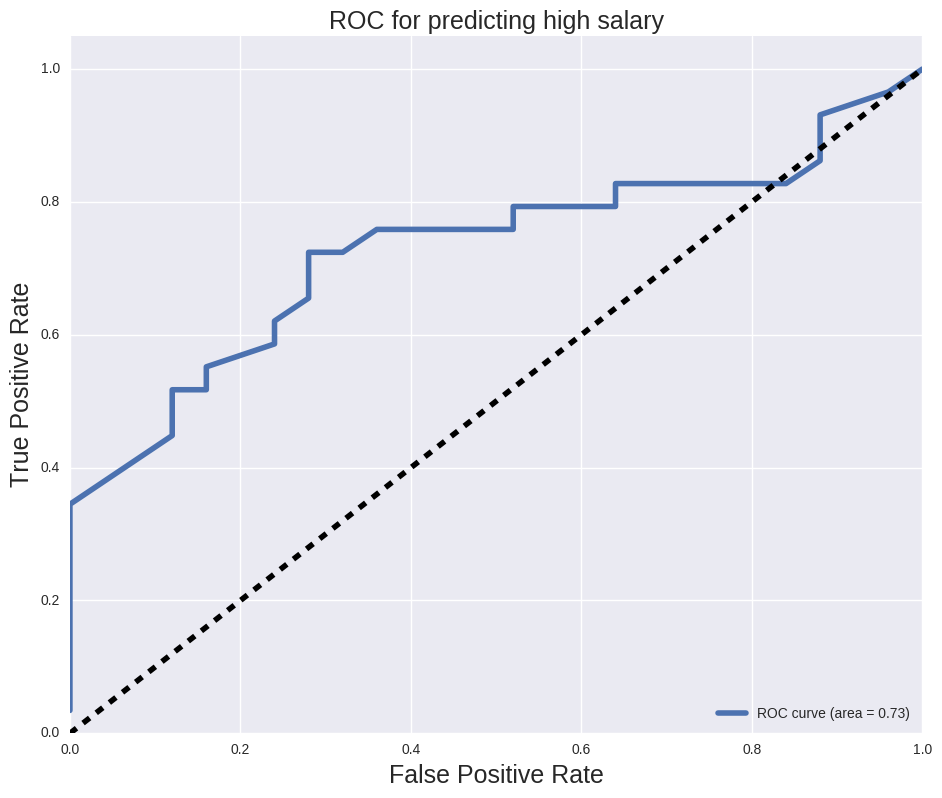

In [50]:
from sklearn.metrics import roc_curve, auc

y_score = logit.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict() # {}

print roc_curve(y_test, y_score)

FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])


plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for predicting high salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [51]:
## L1
X = city_dummies.drop(['is_high_salary'], axis=1)
y = city_dummies['is_high_salary']

logit = LogisticRegression(penalty='l1')
model = logit.fit(X, y)
predictions = model.predict(X)

print model.score(X, y)

0.706766917293


In [52]:
## L2
X = city_dummies.drop(['is_high_salary'], axis=1)
y = city_dummies['is_high_salary']

logit = LogisticRegression(penalty='l2')
model = logit.fit(X, y)
predictions = model.predict(X)

print model.score(X, y)

0.766917293233


The Ridge regularization model performs slightly better than the Lasso regularization (with the default C value, I'll do a grid search with different C's below).

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

Did this below with Count Vectorizer

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=20, # Only use the top 20 most common words
)

# Remake city_dummies to drop word columns since I'm adding them below
city_dummies = pd.get_dummies(has_salary['Search City'])
city_dummies['is_high_salary'] = has_salary['is_high_salary']

# This builds a matrix with a row per job, and variables based on the top 20 words in the title
title_talk = v.fit_transform(has_salary['Title']).todense()
title_talk = pd.DataFrame(title_talk, columns=v.get_feature_names())

# This builds a matrix with a row per job, and variables based on the top 20 words in the summary
body_talk = v.fit_transform(has_salary['Summary']).todense()
body_talk = pd.DataFrame(body_talk, columns=v.get_feature_names())

# Join the title and summary word variables
word_variables = title_talk.join(body_talk, lsuffix='_title', rsuffix='_body')
X = city_dummies.join(word_variables)


print X.shape
X.head()

(133, 56)


,Atlanta,Austin,Chicago,Dallas,Denver,Houston,Los+Angeles,Miami,New+York,Philadelphia,...,machine_body,miami,patient,provides,research_body,scientist_body,scientists,south,statistical_body,university
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
print X.columns

Index([          u'Atlanta',            u'Austin',           u'Chicago',
                  u'Dallas',            u'Denver',           u'Houston',
             u'Los+Angeles',             u'Miami',          u'New+York',
            u'Philadelphia',           u'Phoenix',        u'Pittsburgh',
                u'Portland',     u'San+Francisco',           u'Seattle',
          u'is_high_salary',    u'analysis_title',           u'analyst',
               u'assistant',         u'associate',        u'data_title',
                u'engineer',       u'engineering',                u'ii',
                    u'lead',    u'learning_title',     u'machine_title',
                 u'program',        u'programmer',      u'quantitative',
          u'research_title',   u'scientist_title',            u'senior',
              u'specialist',                u'sr', u'statistical_title',
           u'analysis_body',             u'based',              u'care',
                u'clinical',         u'data_body', 

In [55]:
corr = X.corr()

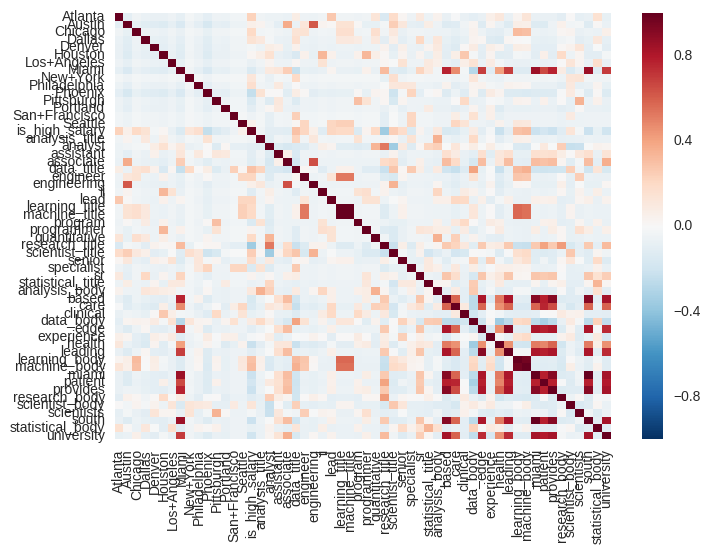

In [56]:
sns.heatmap(corr)

In [57]:
corr['is_high_salary']

Atlanta              0.233937
Austin               0.061392
Chicago              0.196162
Dallas               0.147650
Denver              -0.029556
Houston              0.022844
Los+Angeles         -0.074089
Miami               -0.141459
New+York             0.122635
Philadelphia         0.166591
Phoenix             -0.239431
Pittsburgh          -0.146543
Portland            -0.102790
San+Francisco       -0.051781
Seattle              0.049496
is_high_salary       1.000000
analysis_title      -0.041016
analyst             -0.107827
assistant           -0.102790
associate           -0.116200
data_title           0.294837
engineer             0.215729
engineering          0.061345
ii                  -0.120075
lead                 0.215729
learning_title       0.196162
machine_title        0.196162
program             -0.146543
programmer           0.038044
quantitative         0.196162
research_title      -0.351688
scientist_title      0.247459
senior               0.182125
specialist

In [58]:
title_talk.columns

Index([u'analysis', u'analyst', u'assistant', u'associate', u'data',
       u'engineer', u'engineering', u'ii', u'lead', u'learning', u'machine',
       u'program', u'programmer', u'quantitative', u'research', u'scientist',
       u'senior', u'specialist', u'sr', u'statistical'],
      dtype='object')

In [59]:
body_talk.columns

Index([u'analysis', u'based', u'care', u'clinical', u'data', u'edge',
       u'experience', u'health', u'leading', u'learning', u'machine', u'miami',
       u'patient', u'provides', u'research', u'scientist', u'scientists',
       u'south', u'statistical', u'university'],
      dtype='object')

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [60]:
## L1 default C
X = X.drop(['is_high_salary'], axis=1)
y = city_dummies['is_high_salary']

logit = LogisticRegression(penalty='l1')
model = logit.fit(X, y)
predictions = model.predict(X)

print model.score(X, y)

0.834586466165


In [61]:
# Using grid search to test various alpha values for Lasso and Ridge regularization
from sklearn.grid_search import GridSearchCV

#Prepare a Range of Alpha Values to Test
alphas = np.array(np.arange(1.0,10.0,0.1))

#Create and Fit a Lasso Regression Model, Testing Each Alpha
model_lasso = LogisticRegression(penalty='l1')
# Can check multiple hyperparamters at once with param_grid
grid_lasso = GridSearchCV(estimator=model_lasso, param_grid={'C': alphas, 'fit_intercept': [True, False]})
grid_lasso.fit(X, y)
print grid_lasso

#Summarize the Results of the Grid Search
print grid_lasso.best_score_
print grid_lasso.best_estimator_.C
print grid_lasso.best_estimator_.fit_intercept

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 1. ,  1.1, ...,  9.8,  9.9]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.721804511278
5.3
False


In [62]:
## L2 default C
logit = LogisticRegression(penalty='l2')
model = logit.fit(X, y)
predictions = model.predict(X)

print model.score(X, y)

0.872180451128


In [63]:
# Ridge regularization with a grid search on C values

#Prepare a Range of Alpha Values to Test
alphas = np.array(np.arange(1.0,10.0,0.1))

#Create and Fit a Ridge Regression Model, Testing Each Alpha
model_ridge = LogisticRegression(penalty='l2')
# Can check multiple hyperparamters at once with param_grid
grid_ridge = GridSearchCV(estimator=model_ridge, param_grid={'C': alphas, 'fit_intercept': [True, False]})
grid_ridge.fit(X, y)
print grid_ridge

#Summarize the Results of the Grid Search
print grid_ridge.best_score_
print grid_ridge.best_estimator_.C
print grid_ridge.best_estimator_.fit_intercept

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 1. ,  1.1, ...,  9.8,  9.9]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.699248120301
1.2
False


Without regularization, adding in the top 20 words in each the job title and the summary increased the score of the model. Adding regularization obviously decreased the score of the model.

In [64]:
# Take the best result from the above lasso/ridge grid searches
best_model = LogisticRegression(penalty='l1', C=5.3, fit_intercept=False)
best_model.fit(X, y)

LogisticRegression(C=5.3, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Train-test model for the best_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

best_model_tt = logit.fit(X_train, y_train)
y_predictions = best_model_tt.predict(X_test)

print best_model_tt.score(X_test, y_test)
acc = accuracy_score(y_test, y_predictions)
print acc

0.740740740741
0.740740740741


In [67]:
conmat = np.array(confusion_matrix(y_test, y_predictions))

confusion = pd.DataFrame(conmat, index=['is_high_salary', 'not_high_salary'],
                         columns=['predicted_high_salary','predicted_not_high_salary'])

confusion

,predicted_high_salary,predicted_not_high_salary
is_high_salary,19,3
not_high_salary,11,21


In [68]:
TP = confusion.ix['is_high_salary', 'predicted_high_salary']
FP = confusion.ix['not_high_salary', 'predicted_high_salary']
TN = confusion.ix['not_high_salary', 'predicted_not_high_salary']
FN = confusion.ix['is_high_salary', 'predicted_not_high_salary']

zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN])

[('True Positives', 19),
 ('False Positives', 11),
 ('True Negatives', 21),
 ('False Negatives', 3)]

In [69]:
cls_rep = classification_report(y_test, y_predictions)
print cls_rep

             precision    recall  f1-score   support

          0       0.63      0.86      0.73        22
          1       0.88      0.66      0.75        32

avg / total       0.78      0.74      0.74        54



(array([ 0.        ,  0.        ,  0.04545455,  0.04545455,  0.09090909,
        0.09090909,  0.13636364,  0.13636364,  0.22727273,  0.22727273,
        0.27272727,  0.27272727,  0.31818182,  0.31818182,  0.72727273,
        0.72727273,  0.77272727,  0.77272727,  1.        ]), array([ 0.03125,  0.4375 ,  0.4375 ,  0.53125,  0.53125,  0.625  ,
        0.625  ,  0.75   ,  0.75   ,  0.875  ,  0.875  ,  0.90625,
        0.90625,  0.9375 ,  0.9375 ,  0.96875,  0.96875,  1.     ,  1.     ]), array([ 3.16996037,  0.77976238,  0.51808556,  0.318951  ,  0.31357381,
        0.08148851,  0.03964515, -0.07708887, -0.12071759, -0.51516583,
       -0.59922726, -0.72426173, -0.76502252, -0.8673722 , -1.62898119,
       -1.75689206, -1.7814179 , -1.79699499, -2.38412741]))


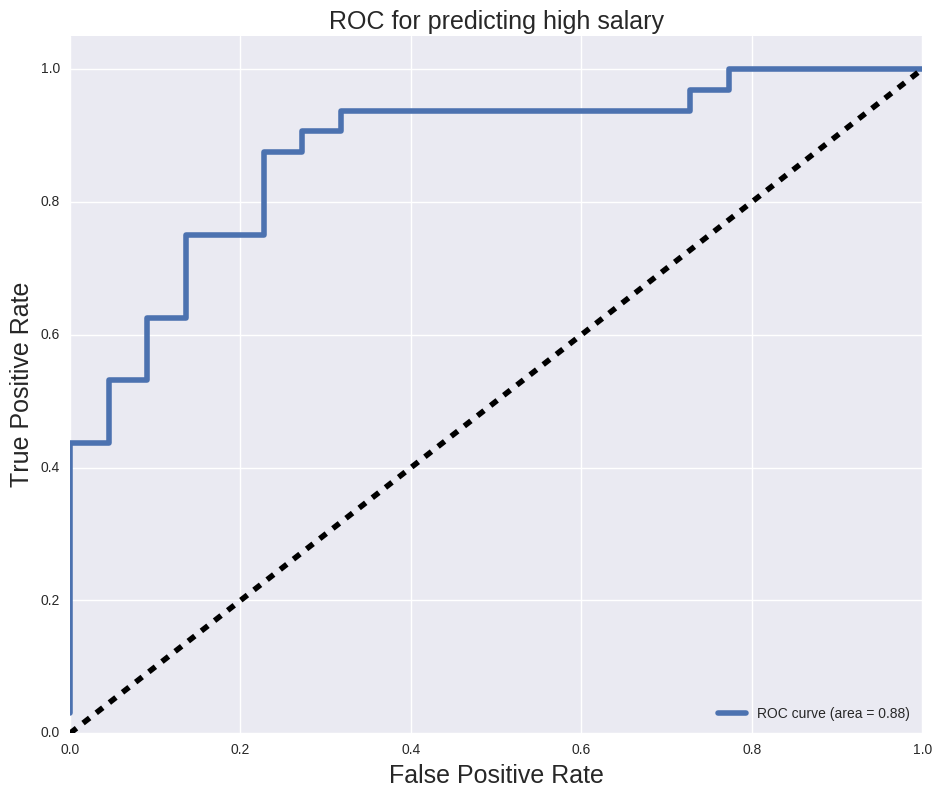

In [70]:
y_score = logit.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict() # {}

print roc_curve(y_test, y_score)

FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])


plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for predicting high salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [71]:
# Now attempting to apply this best_model to the original full dataset, df, where not all entries have a salary posted
df.head()

,Unnamed: 0,Company,Location,Salary,Search City,Summary,Title,Yearly Salary
0,0,SYSCO,"Houston, TX 77038",NaN,Houston,Build predictive analytics models with Python ...,Sr Data Scientist,NaN
1,1,alliantgroup,"Houston, TX",NaN,Houston,"Engineers, and scientists to identify and subs...",Project Associate,NaN
2,2,Arundo Analytics,"Houston, TX",NaN,Houston,Senior Data Scientist with expertise in machin...,Machine Learning Expert,NaN
3,3,Quantlab Financial,"Houston, TX",NaN,Houston,Technology and Scientific Research are central...,Quantitative Research Scientist - Options Stra...,NaN
4,4,Exxon Mobil,"Houston, TX",NaN,Houston,Experience in relevant areas of scientific exp...,Data Scientist,NaN


In [72]:
# get dummy variables for city
full_city_dummies = pd.get_dummies(df['Search City'])
full_city_dummies.head()

,Atlanta,Austin,Chicago,Dallas,Denver,Houston,Los+Angeles,Miami,New+York,Philadelphia,Phoenix,Pittsburgh,Portland,San+Francisco,Seattle
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Create an X using the full dataset, consisting of dummy variables for the city and the most common words
# Same as above, but I'm doing this for the full dataset so I can use the model to predict whether or not the 
# salaries are high for the listings with no salary posted
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=20, # Only use the top 20 most common words
)

# This builds a matrix with a row per job, and variables based on the top 20 words in the title
full_title_talk = v.fit_transform(df['Title']).todense()
full_title_talk = pd.DataFrame(full_title_talk, columns=v.get_feature_names())

# This builds a matrix with a row per job, and variables based on the top 20 words in the summary
full_body_talk = v.fit_transform(df['Summary']).todense()
full_body_talk = pd.DataFrame(full_body_talk, columns=v.get_feature_names())

# Join the title and summary word variables
full_word_variables = full_title_talk.join(full_body_talk, lsuffix='_title', rsuffix='_body')
X_full = full_city_dummies.join(full_word_variables)


print X_full.shape
X_full.head()

(1739, 55)


,Atlanta,Austin,Chicago,Dallas,Denver,Houston,Los+Angeles,Miami,New+York,Philadelphia,...,mining,research_body,science_body,scientist_body,scientists,statistical_body,team,visualization,work,years
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Now predicting is_high_salary for the full dataset, using the best model I found above
full_predictions = best_model.predict(X_full)
print full_predictions.mean()

0.53421506613


When applying the model to the full dataset, 53% of the results are predicted to be high salary. 

Executive summary:
    http://nick-dsi.blogspot.com/2016/10/project-4-web-scraping-logistic.html